In [1]:
import pandas as pd
import numpy as np
import dtale
import sweetviz as sv
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# first_demo is the Facebook supplied test data, second_demo was created from the largest relevant data we have.
first_demo = pd.read_csv('C:/Users/norri/Desktop/dt_simulated.csv')
second_demo = pd.read_csv('C:/Users/norri/Desktop/robyn_zeroes.csv')
first_demo.round(2)
second_demo.round(2)

,DATE,banner_I,blog_I,coupon_I,email_I,social_I,text_I,website_I,ecom_I,display_I,...,display_S,event_S,other_S,post_S,sweepstakes_S,mail_S,radio_S,circular_S,retailer_S,revenue
0,10/5/2019,62836886,11405123,183809663,0,5945479,0,146664,0,12600000,...,0.0,0.00,0.00,108489.42,513000,0,0,26955.29,2.772000e+05,8.977483e+07
1,10/12/2019,120592917,11405123,183809663,0,5945479,0,146664,0,12600000,...,0.0,0.00,379997.60,657371.26,513000,0,0,26955.29,7.572986e+05,1.119191e+08
2,10/19/2019,181801495,54811539,205679120,0,14945163,0,146664,0,12600000,...,0.0,82116.48,379997.60,664560.05,513000,0,0,26955.29,7.572986e+05,1.106076e+08
3,10/26/2019,206085547,59584985,214955960,456667,17167385,0,146664,0,12600000,...,0.0,120441.82,415348.35,705420.97,513000,0,0,26955.29,7.653936e+05,1.086742e+08
4,11/2/2019,886963849,505839713,833886179,16856395,17167385,0,146664,0,12600000,...,0.0,206420.41,415348.35,2683025.76,513000,1720000,0,26955.29,2.587007e+06,3.595164e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,4/17/2021,164301683,3714622,7695819,2964073,15120000,0,0,0,2000000,...,0.0,0.00,0.00,74175.34,0,0,0,0.00,1.189420e+08,3.510714e+08
81,4/24/2021,164301683,3714622,7695819,2964073,15120000,0,0,0,2000000,...,0.0,0.00,0.00,74175.34,0,0,0,0.00,1.189420e+08,3.277938e+08
82,5/1/2021,160411811,3714622,4654091,2964073,15120000,0,0,0,2000000,...,0.0,0.00,0.00,74175.34,0,0,0,0.00,1.193764e+08,3.260223e+08
83,5/8/2021,63853937,3714622,413576,2964073,0,0,0,0,2000000,...,0.0,0.00,0.00,9500.00,0,0,0,0.00,1.191789e+08,3.114845e+08


I initially compared the first weekly demo data from Robyn with the most recent, which they were. There have been a few changes to the program, it seems, but not the data. There was one thing of note:  if you examined the correlation between revenue and competitor_sales_B, it was the only high correlation, and in experiment 2, when we dropped it, the entire model changed for the worse.

On a side note, D-Tale and SweetViz are fantastic EDA tools, with a few interactive functions, but SweetViz will open a new browser window for every run it makes.

In [3]:
dtale.show(first_demo) # note the predictive power score for revenue: it's the only scored variable at all and it's at .63

In [4]:
dtale.show(second_demo) # there are quite a few more correlated variables with revenue, but nothing much about .5.

SweetViz can tell you a great deal about the numerical variables in your data, as well as provide an 'Associations' tab much like a correlation plot.

In [5]:
sweet_report = sv.analyze(first_demo)
sweet_report.show_html('sweet_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


The accuracy of this report is certainly affected by all the missing values, but we can compare it to the data after we impute the missings.

In [6]:
sweet_report_2 = sv.analyze(second_demo)
sweet_report_2.show_html('sweet_report_2.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweet_report_2.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Because of the missing_values, the comparison between the two datasets is not of much use as of yet.

In [7]:
sweet_report_3 = sv.compare(first_demo, second_demo)
sweet_report_3.show_html('sweet_report_3.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweet_report_3.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


To give you a better impression of how much missing data there is, I provided the actual missing values, out of 146, the percentage of missing values, and the average of the percentage missing.

In [8]:
missing_values = second_demo.isnull().sum()
print(missing_values)
print(np.average(missing_values))

DATE             0
banner_I         0
blog_I           0
coupon_I         0
email_I          0
social_I         0
text_I           0
website_I        0
ecom_I           0
display_I        0
event_I          0
other_I          0
post_I           0
sweepstakes_I    0
mail_I           0
radio_I          0
circular_I       0
retailer_I       0
banner_S         0
blog_S           0
coupon_S         0
email_S          0
social_S         0
text_S           0
website_S        0
ecom_S           0
display_S        0
event_S          0
other_S          0
post_S           0
sweepstakes_S    0
mail_S           0
radio_S          0
circular_S       0
retailer_S       0
revenue          0
dtype: int64
0.0


The average is 27, so any number 28 or above will have to be dropped, along with its matching spend or impressions. Otherwise, it could affect the imputation and therefore the correlation in Roybn prediction.

In [9]:
second_demo = second_demo.drop(['text_I', 'text_S', 'website_I', 'website_S', 'ecom_I', 'ecom_S', 'event_I',
                                'event_S', 'sweepstakes_I', 'sweepstakes_S', 'mail_I', 'mail_S', 'radio_I',
                                'radio_S', 'text_S', 'text_I', 'other_I', 'other_S'], axis=1)

,banner_I,blog_I,coupon_I,email_I,social_I,display_I,post_I,circular_I,retailer_I,banner_S,blog_S,coupon_S,email_S,social_S,display_S,post_S,circular_S,retailer_S,revenue
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,0.573158,0.573158,0.504737,0.562105,0.285263,0.190000,0.055789,0.385789,-0.082105,0.562632,0.565789,0.521053,0.557368,0.266842,0.321579,0.368421,0.267368,0.230526,0.384211
std,0.357352,0.352516,0.349911,0.335105,0.373130,0.326803,0.322720,0.328453,0.366842,0.356976,0.360190,0.365284,0.354665,0.375278,0.355297,0.308027,0.313401,0.352601,0.212585
min,-0.310000,-0.290000,-0.350000,-0.150000,-0.320000,-0.340000,-0.500000,-0.220000,-0.460000,-0.290000,-0.330000,-0.350000,-0.250000,-0.330000,-0.460000,-0.380000,-0.300000,-0.500000,0.080000
25%,0.380000,0.400000,0.315000,0.445000,-0.050000,0.095000,-0.115000,0.330000,-0.320000,0.400000,0.370000,0.345000,0.420000,-0.040000,0.080000,0.220000,0.095000,0.000000,0.245000
50%,0.550000,0.530000,0.510000,0.520000,0.360000,0.200000,-0.030000,0.460000,-0.250000,0.520000,0.580000,0.490000,0.520000,0.330000,0.430000,0.470000,0.330000,0.300000,0.370000
75%,0.890000,0.890000,0.780000,0.875000,0.465000,0.290000,0.155000,0.590000,0.055000,0.880000,0.875000,0.825000,0.875000,0.435000,0.530000,0.535000,0.385000,0.420000,0.485000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


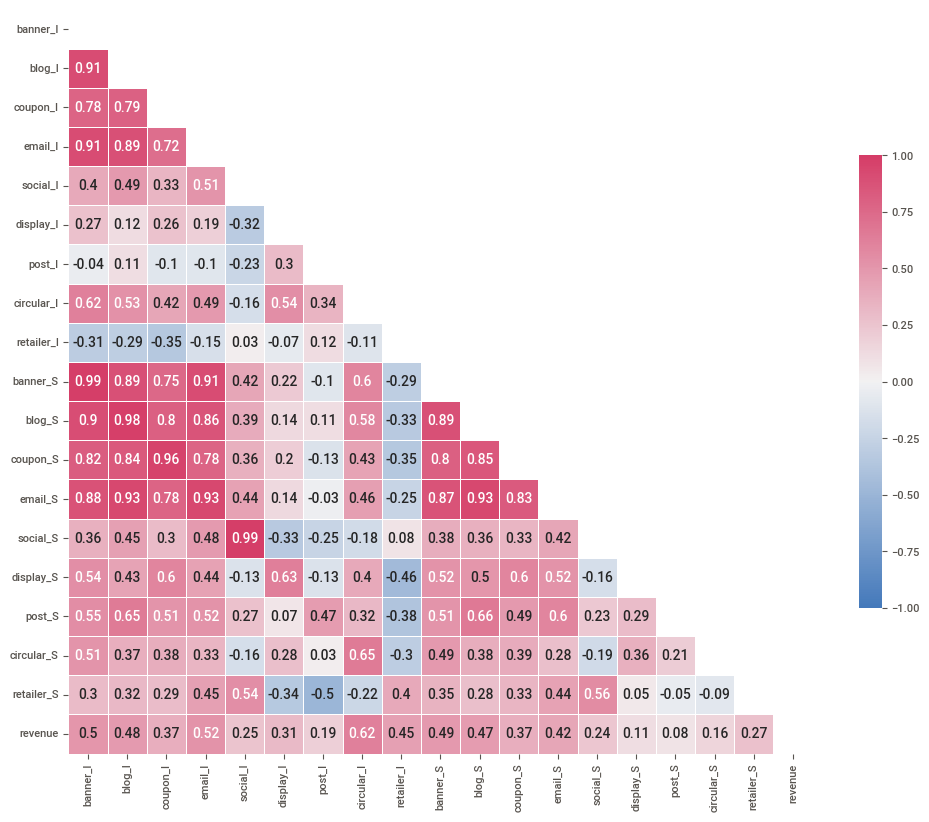

In [10]:
corr = second_demo.corr(method="spearman").round(2)
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(12, 12))
cmap = sns.diverging_palette(250, 1, as_cmap=True)
sns.heatmap(corr, annot=True, cmap=cmap, mask=mask, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
corr.describe()

Here I begin the process of imputing missing values. I have to split the date off for this method to work.

In [11]:
second_demo['ID'] = second_demo.reset_index().index
date_split = second_demo[['DATE']]
imp_split = second_demo.drop(['DATE'], axis=1)
date_split['ID'] = imp_split['ID']
col_names = list(imp_split.columns)
second_demo.describe()

C:\Users\norri\AppData\Local\Temp\ipykernel_8876\4021339468.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,banner_I,blog_I,coupon_I,email_I,social_I,display_I,post_I,circular_I,retailer_I,banner_S,blog_S,coupon_S,email_S,social_S,display_S,post_S,circular_S,retailer_S,revenue,ID
count,8.500000e+01,8.500000e+01,8.500000e+01,8.500000e+01,8.500000e+01,8.500000e+01,8.500000e+01,8.500000e+01,8.500000e+01,8.500000e+01,8.500000e+01,8.500000e+01,8.500000e+01,8.500000e+01,8.500000e+01,8.500000e+01,8.500000e+01,8.500000e+01,8.500000e+01,85.000000
mean,2.224663e+09,6.153778e+08,4.140407e+08,9.101458e+07,8.315909e+07,1.596968e+09,2.020266e+11,1.717454e+08,9.673555e+10,1.269550e+07,4.477150e+06,4.224673e+06,1.092532e+06,6.314428e+05,2.669590e+06,9.182706e+05,7.140713e+05,2.128251e+07,1.216452e+09,42.000000
std,3.319876e+09,8.507986e+08,5.410939e+08,1.515956e+08,1.139285e+08,3.865995e+09,4.550387e+11,2.197197e+08,2.447254e+11,1.969157e+07,6.532129e+06,6.401005e+06,1.655913e+06,8.659650e+05,6.813230e+06,9.619814e+05,2.328294e+06,3.759674e+07,9.603220e+08,24.681302
min,1.142322e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.200000e+06,0.000000e+00,3.245986e+07,8.566006e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.500000e+03,0.000000e+00,3.019460e+04,8.977483e+07,0.000000
25%,1.701944e+08,2.577117e+07,5.567532e+06,2.964073e+06,3.927728e+06,8.000000e+06,1.218462e+08,6.000000e+06,4.317307e+08,8.087760e+05,1.600000e+05,1.449536e+05,1.250000e+04,2.500000e+04,0.000000e+00,1.693381e+05,0.000000e+00,1.791495e+06,3.277938e+08,21.000000
50%,6.327880e+08,3.597878e+08,8.717964e+07,2.965640e+07,4.155625e+07,6.244000e+07,1.652077e+09,3.400000e+07,2.105825e+09,3.648659e+06,1.235978e+06,5.674667e+05,4.010000e+05,1.971496e+05,0.000000e+00,6.707055e+05,0.000000e+00,2.807401e+06,1.272728e+09,42.000000
75%,2.038079e+09,7.659713e+08,6.538953e+08,7.344338e+07,1.108108e+08,2.560000e+08,3.129434e+09,2.570000e+08,3.722472e+10,9.755107e+06,4.572212e+06,2.629919e+06,9.100001e+05,9.300000e+05,1.263900e+03,1.170464e+06,2.695529e+04,2.120635e+07,1.591531e+09,63.000000
max,1.112840e+10,2.801696e+09,2.330863e+09,4.529153e+08,4.340891e+08,1.203000e+10,1.230000e+12,7.297750e+08,7.630000e+11,6.659498e+07,2.104940e+07,2.771621e+07,5.221800e+06,2.879545e+06,2.107000e+07,3.340569e+06,9.086380e+06,1.228992e+08,3.684777e+09,84.000000


In [12]:
imp_split.to_numpy().astype(np.int)

C:\Users\norri\AppData\Local\Temp\ipykernel_8876\3169708645.py:1: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



array([[ 62836886,  11405123, 183809663, ...,    277200,  89774827,
                0],
       [120592917,  11405123, 183809663, ...,    757298, 111919125,
                1],
       [181801495,  54811539, 205679120, ...,    757298, 110607594,
                2],
       ...,
       [160411811,   3714622,   4654091, ..., 119376370, 326022261,
               82],
       [ 63853937,   3714622,    413576, ..., 119178881, 311484469,
               83],
       [ 73609594,   9617223,    413576, ...,   2568881, 239727224,
               84]])

IterativeImputer is one of the newest imputation MLs out, and it is very resource intensive. It's imputations are supposed to be excellent, but you can only do so much with so much missing data.

In [13]:
it_imp = IterativeImputer(random_state=42, max_iter=10, initial_strategy='most_frequent', imputation_order='ascending',
                          min_value=15000, max_value=64000, verbose=2, sample_posterior=True)

In [14]:
it_imp.fit(imp_split)

[IterativeImputer] Completing matrix with shape (85, 20)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.04
[IterativeImputer] Ending imputation round 2/10, elapsed time 0.07
[IterativeImputer] Ending imputation round 3/10, elapsed time 0.10
[IterativeImputer] Ending imputation round 4/10, elapsed time 0.12
[IterativeImputer] Ending imputation round 5/10, elapsed time 0.15
[IterativeImputer] Ending imputation round 6/10, elapsed time 0.18
[IterativeImputer] Ending imputation round 7/10, elapsed time 0.21
[IterativeImputer] Ending imputation round 8/10, elapsed time 0.24
[IterativeImputer] Ending imputation round 9/10, elapsed time 0.27
[IterativeImputer] Ending imputation round 10/10, elapsed time 0.30


IterativeImputer(initial_strategy='most_frequent', max_value=64000,
                 min_value=15000, random_state=42, sample_posterior=True,
                 verbose=2)

In [15]:
imputed = it_imp.transform(imp_split)

[IterativeImputer] Completing matrix with shape (85, 20)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.00
[IterativeImputer] Ending imputation round 2/10, elapsed time 0.00
[IterativeImputer] Ending imputation round 3/10, elapsed time 0.00
[IterativeImputer] Ending imputation round 4/10, elapsed time 0.00
[IterativeImputer] Ending imputation round 5/10, elapsed time 0.00
[IterativeImputer] Ending imputation round 6/10, elapsed time 0.00
[IterativeImputer] Ending imputation round 7/10, elapsed time 0.00
[IterativeImputer] Ending imputation round 8/10, elapsed time 0.00
[IterativeImputer] Ending imputation round 9/10, elapsed time 0.00
[IterativeImputer] Ending imputation round 10/10, elapsed time 0.00


I merged the dates back in, and as you can see, the missing values are gone, and they all look pretty reasonable. I'll repeat most of the tests I ran earlier to see if there's anything not obvious.

In [16]:
second_demo = pd.DataFrame(imputed, columns=col_names)
second_demo = second_demo.set_axis(col_names, axis=1)
second_demo = pd.merge(second_demo, date_split, how='inner')
second_demo = second_demo.drop(['ID'], axis=1)
round(second_demo, 2)

,banner_I,blog_I,coupon_I,email_I,social_I,display_I,post_I,circular_I,retailer_I,banner_S,blog_S,coupon_S,email_S,social_S,display_S,post_S,circular_S,retailer_S,revenue,DATE
0,62836886.0,11405123.0,183809663.0,0.0,5945479.0,12600000.0,9.603111e+08,1202640.0,1.293811e+08,247331.83,90003.23,447628.45,0.0,30000.00,0.0,108489.42,26955.29,2.772000e+05,8.977483e+07,10/5/2019
1,120592917.0,11405123.0,183809663.0,0.0,5945479.0,12600000.0,1.499677e+09,1202640.0,1.344741e+08,442966.83,90003.23,447628.45,0.0,30000.00,0.0,657371.26,26955.29,7.572986e+05,1.119191e+08,10/12/2019
2,181801495.0,54811539.0,205679120.0,0.0,14945163.0,12600000.0,1.652077e+09,1202640.0,1.344741e+08,648786.40,339515.58,558250.87,0.0,82633.08,0.0,664560.05,26955.29,7.572986e+05,1.106076e+08,10/19/2019
3,206085547.0,59584985.0,214955960.0,456667.0,17167385.0,12600000.0,1.658077e+09,1202640.0,1.345558e+08,721169.03,370265.58,553719.14,14500.0,94919.86,0.0,705420.97,26955.29,7.653936e+05,1.086742e+08,10/26/2019
4,886963849.0,505839713.0,833886179.0,16856395.0,17167385.0,12600000.0,3.142603e+09,35202640.0,1.801133e+08,4247910.47,3872465.58,3023477.68,894500.0,94919.86,0.0,2683025.76,26955.29,2.587007e+06,3.595164e+08,11/2/2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,164301683.0,3714622.0,7695819.0,2964073.0,15120000.0,2000000.0,4.180201e+07,0.0,7.610000e+11,983449.00,47000.00,150808.30,10000.0,135000.00,0.0,74175.34,0.00,1.189420e+08,3.510714e+08,4/17/2021
81,164301683.0,3714622.0,7695819.0,2964073.0,15120000.0,2000000.0,4.180201e+07,0.0,7.610000e+11,983449.00,47000.00,150808.30,10000.0,135000.00,0.0,74175.34,0.00,1.189420e+08,3.277938e+08,4/24/2021
82,160411811.0,3714622.0,4654091.0,2964073.0,15120000.0,2000000.0,4.180201e+07,0.0,7.610000e+11,1147449.00,47000.00,221427.00,10000.0,135000.00,0.0,74175.34,0.00,1.193764e+08,3.260223e+08,5/1/2021
83,63853937.0,3714622.0,413576.0,2964073.0,0.0,2000000.0,8.200000e+06,0.0,7.610000e+11,434673.00,47000.00,108399.00,10000.0,0.00,0.0,9500.00,0.00,1.191789e+08,3.114845e+08,5/8/2021


In [17]:
dtale.show(second_demo) # the revenue correlations look much more reasonable, with all of the present, but only banner spend breaking .5. Also, the power analysis doesn't reveal anything strange towards revenue.

The histograms look more normal, and the 'Associations' plot actually works this time, but there are some warnings that the calculations are a bit off.

In [18]:
sweet_report_4 = sv.analyze(second_demo)
sweet_report_4.show_html('sweet_report_4.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweet_report_4.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Similar to the plot above, this is to compare how everything changed after imputation.

While I can't run all the same tests on Tyson data or Robyn, I will be doing comparisons. I filled the missings with zeroes for this dataset before the imputation, and will run both in Robyn to see how they perform. For Tyson data, I'll drop any variables that would not be useful to Robyn, and examine the quality that is left.

Though there's not universal agreement, most agree that a VIF of 1 is not correlated, between 1 and 5 moderately correlated, and greater than 5 highly correlated. Robyn uses ridge regression, which does deflate the coefficients of high VIF variables, but since we have limited spots in our Robyn model, it could be a good criteria for elimination.

In [19]:
temp_split = second_demo.drop(['DATE'], axis=1)
vif_df = temp_split[~temp_split.isin([np.nan, np.inf, -np.inf]).any(1)]
X = vif_df
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

       feature           VIF
0     banner_I   6554.126945
1       blog_I    958.910396
2     coupon_I    173.236440
3      email_I    770.785919
4     social_I    274.078306
5    display_I  39125.921270
6       post_I     29.406826
7   circular_I     41.231199
8   retailer_I   2503.038384
9     banner_S   6882.675247
10      blog_S   1046.254503
11    coupon_S    333.287392
12     email_S   1028.423954
13    social_S    165.918345
14   display_S  39464.560916
15      post_S     49.315188
16  circular_S      8.969699
17  retailer_S   2741.590225
18     revenue     34.834080


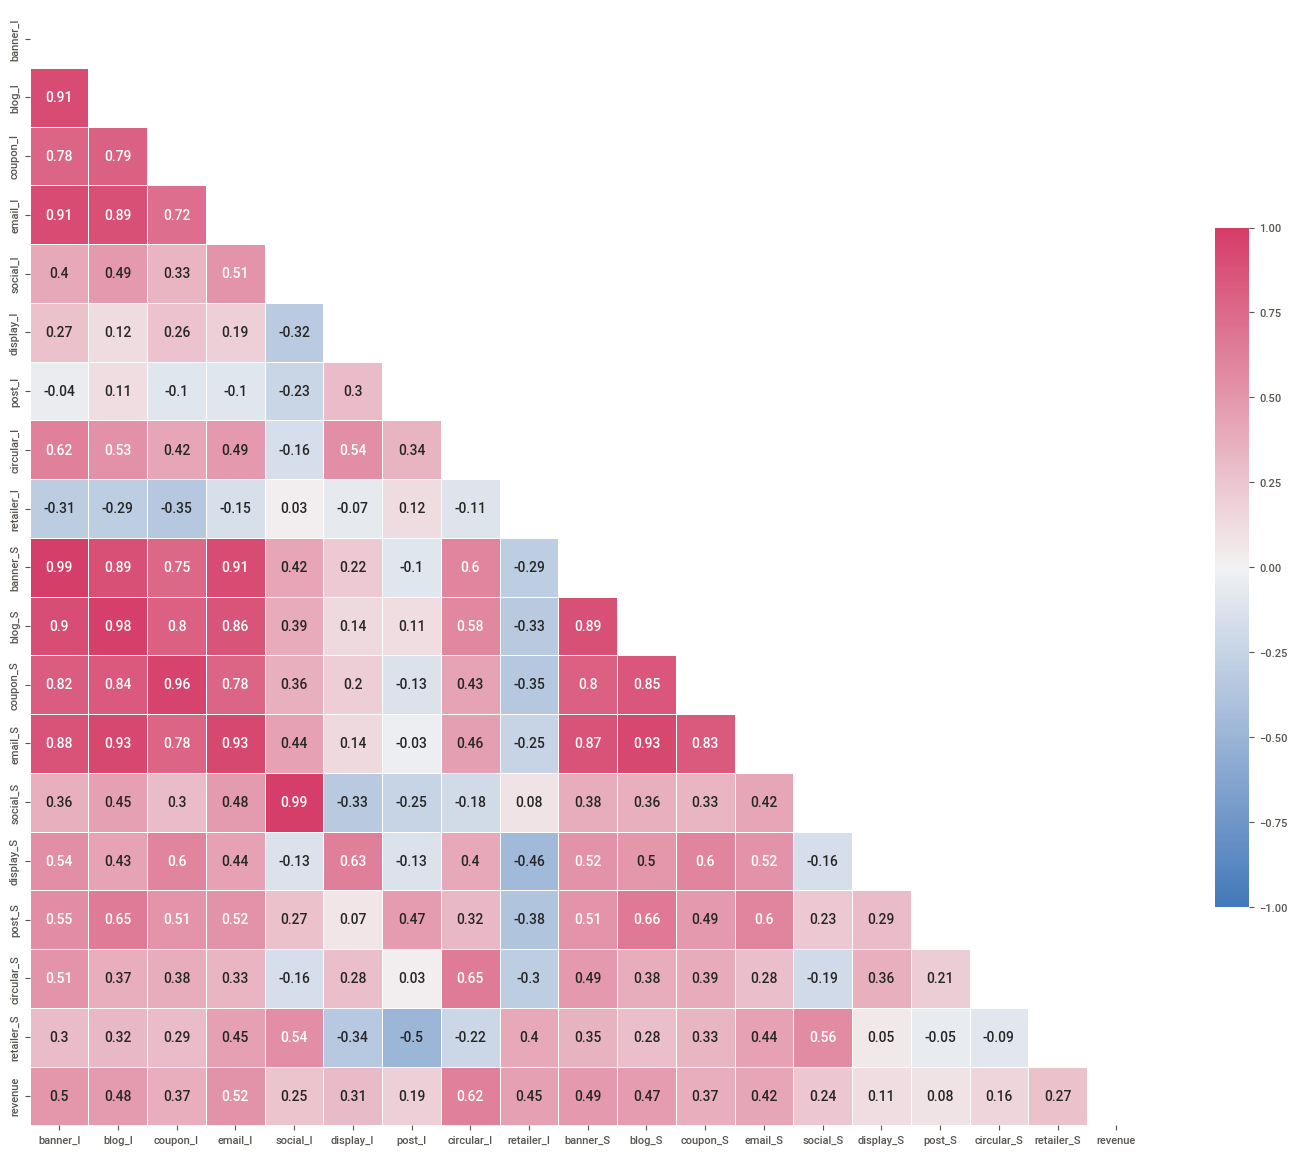

In [20]:
corr_vif = vif_df.corr(method="spearman").round(2)
mask = np.triu(np.ones_like(corr_vif, dtype=bool))
plt.subplots(figsize=(18, 18))
cmap = sns.diverging_palette(250, 1, as_cmap=True)
sns.heatmap(corr_vif, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
second_demo = second_demo.drop(['display_I', 'display_S'], axis=1)

After a few deletions, the VIF was still high, but I felt it was ok for a ridge regression. This output contained many missing values, which I filled in with zeroes. I then impute those values to make them work with Roybn.

In [21]:
second_demo.to_csv('robyn_imputed.csv', index=False)